All the photos I save aren't organized in any way at all so I wanted to create something that would differentiate between all the memes I save and any other regular photo. So I tried to use Deep learning to try and make something that would be able to accurately predict if I photo was a meme or not.


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.widgets import*
from pathlib import Path

In [2]:
bs = 8; #because I heff small GPU

In [3]:
path = Path('meme_not'); path #set path to be used for images

WindowsPath('meme_not')

In [4]:
np.random.seed(42) # so that validation set remains the same for all trials
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=bs,  num_workers=4).normalize(imagenet_stats)


We set the random.seed so that we always have the same validation set. This guarantees that the model is really learning to predict the data instead of just knowing beforehand the validation set becuase of previous trials.

In [5]:
data.classes #meme and not meme are the only categories we will use

#I got the memes (700+ photos) from Gio, and the Non-memes (600+ photos) from EJ 

['Meme', 'Not Meme']

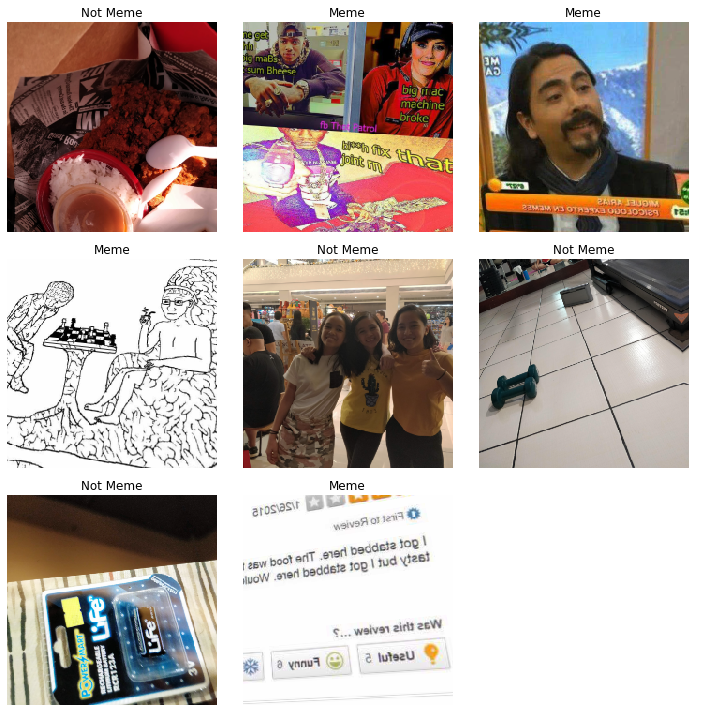

In [50]:
data.show_batch(rows=3,figsize=(10,10)) #show some of the data

In [ ]:
We used a Resnet34 architecture to classify the images

In [7]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)


In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.734397,0.341823,0.133333,03:45
1,0.556379,0.269516,0.111111,03:38
2,0.405176,0.162441,0.077778,03:39
3,0.366284,0.152539,0.059259,03:41


In [9]:
learn.save('stage1')

Interpreting the results

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses(9)




In [11]:
for p in data.valid_ds.x.items[idxs]:
    print(p)


meme_not\Meme\FB_IMG_1470199497768.jpg
meme_not\Meme\FB_IMG_1484876536864.jpg
meme_not\Not Meme\000095990012.jpg
meme_not\Meme\FB_IMG_1483803957025.jpg
meme_not\Meme\FB_IMG_1476091471049.jpg
meme_not\Not Meme\IMG_20191225_231705.jpg
meme_not\Meme\FB_IMG_1484279807271.jpg
meme_not\Meme\FB_IMG_1477471168869.jpg
meme_not\Meme\FB_IMG_1481678787518.jpg


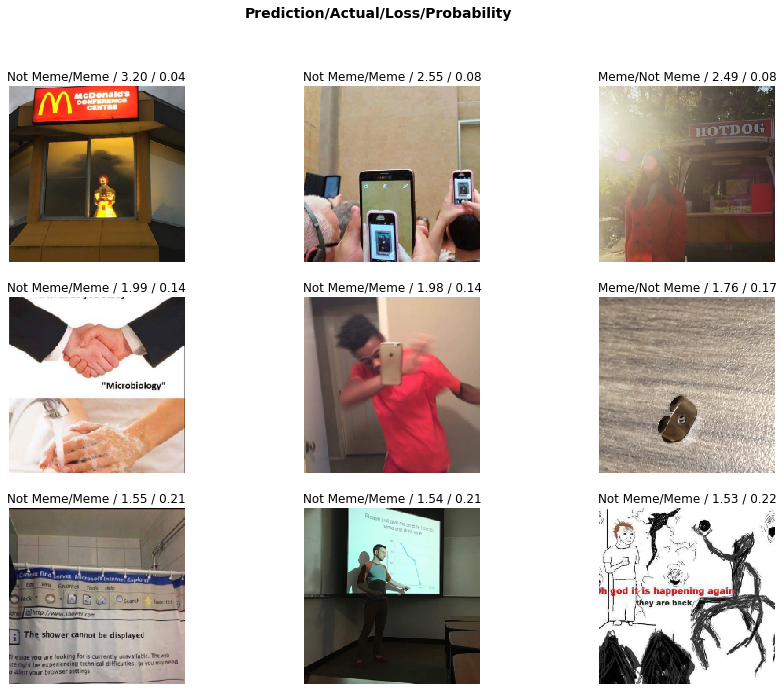

In [12]:
interp.plot_top_losses(9, figsize =(15,11)) # Show the worst performing images

Looking at these results, a lot of these mistakes are pretty understandable because some of the Memes just look like regular pictures.

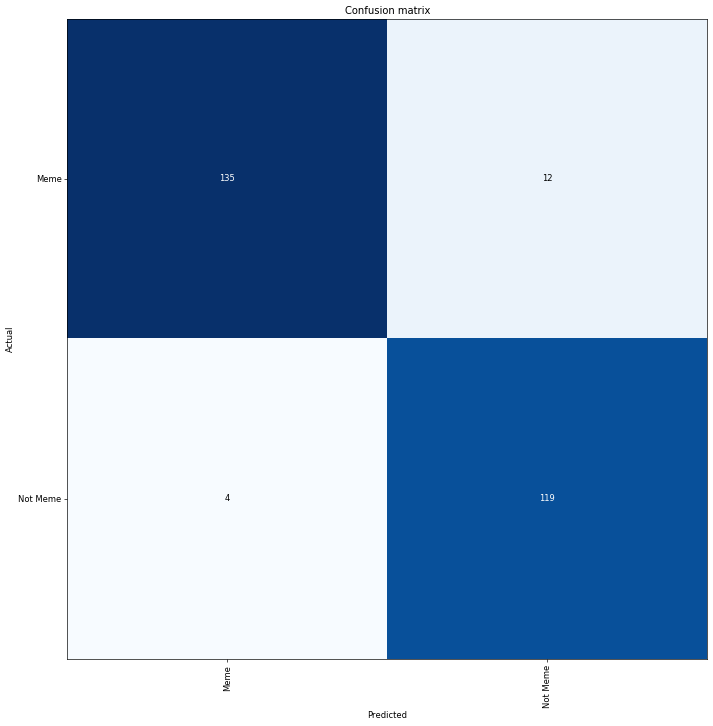

In [13]:
interp.plot_confusion_matrix(figsize = (12,12), dpi=60) # more visual help

In [14]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.467744,0.295505,0.122222,03:49


In [15]:
learn.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList (1083 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Meme,Meme,Meme,Meme,Meme
Path: meme_not;

Valid: LabelList (270 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Meme,Meme,Not Meme,Not Meme,Not Meme
Path: meme_not;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [20]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)
#learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


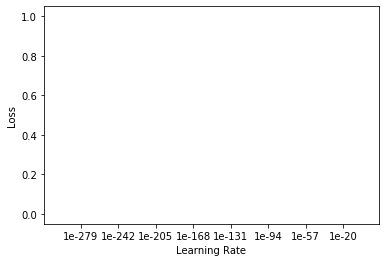

In [23]:
learn.recorder.plot()


Adjust the learning rate accordingly

In [18]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.286828,0.175154,0.074074,03:51
1,0.261719,0.129392,0.055556,03:52
2,0.173046,0.115549,0.051852,03:48
3,0.177234,0.141404,0.051852,03:50


In [21]:
learn.save('stage2')

In [24]:
learn.load('stage2')
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses(9)





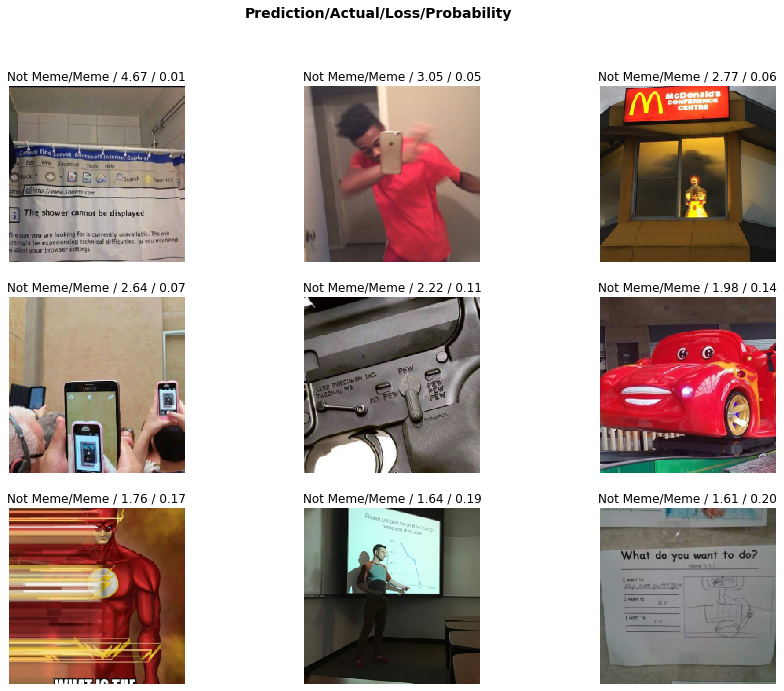

In [25]:
interp.plot_top_losses(9, figsize =(15,11)) # Show the worst performing images

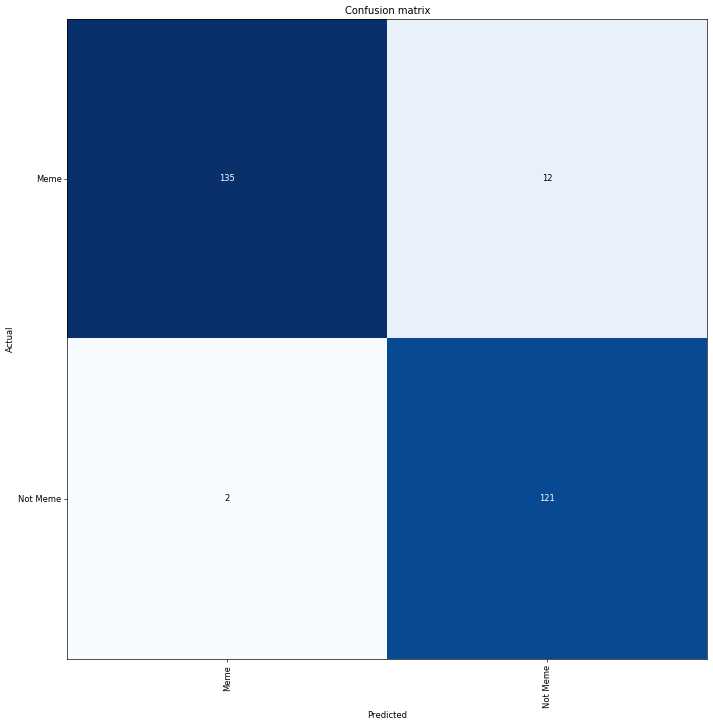

In [26]:
interp.plot_confusion_matrix(figsize = (12,12), dpi=60) # more visual help

Results now are slightly better than before. The model is able to predict Meme vs. not meme with an accuracy rate of almost 95%

P.S. I'm a noobie so i might have done some stuff wrong 